# Ciencia de datos (CC408) - Primavera 2024

## Trabajo Práctico 1 - Parte 2

### Reglas de formato y presentation
- El trabajo debe tener una extensión máxima de 8 páginas (no se permite Apéndice). Se espera una buena redacción en la resolución del práctico.
- El informe debe ser entregado en formato PDF, con los gráficos e imágenes en este mismo archivo.
- Entregar el código con los comandos utilizados, identificando claramente a qué inciso corresponde cada comando.

### Fecha de entrega:
Miércoles 2 de octubre a las 23:59 hs.

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 - Parte 2 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- al siguiente email: ispiousas@udesa.edu.ar
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, no se corregirán sus tareas hasta no recibir el correo.
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija. 

### Parte I: Limpieza de la base

#### Ejercicio 1
La base de datos provista contiene información sobre oferentes de Airbnb en la ciudad de Nueva York. Realicen una limpieza de la base.
- Tengan en cuenta si hay valores duplicados y eliminénlos.
- Eliminen las columnas que no tienen información de interés.
- (Opcional) Luego de leer el artículo __[Missing-data imputation](https://bookdown.org/mike/data_analysis/imputation-missing-data.html##imputation-missing-data)__ (__[Missing-data imputation articulo alternativo](http://www.stat.columbia.edu/~gelman/arm/missing.pdf)__), decidan qué hacer con los missing values e implementen su decision. Justifiquen su eleccion. Pueden usar informacion del paper mencionado o de otras fuentes (citenlas si las usan) para explicar los problemas que pueden surgir por su estrategia elegida.
- Si hay observaciones con *outliers* o valores que no tienen sentido, tomen una decision. Expliquen las decisiones tomadas.
- Transformen las variables **‘neighbourhood_group’** y **‘room_type’** a variables numericas.
- Con la ayuda de los comandos <code>groupby</code> y <code>join</code> o <code>merge</code>, creen una columna que tenga la cantidad de oferentes por “Neighbourhood group”. Llamen a esa nueva columna <code>offer group</code>

In [132]:
# Resolver acá
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns


In [2]:
# base tizi
primera_base_airbnb = pd.read_csv(r"C:\Users\tizip\OneDrive\Documentos\Tizi UdeSA\8- Ciencia de datos\CC408-T1-4\TP2 probar\TP2\Base Airbnb NY.csv")

# base angie
# primera_base_airbnb = pd.read_csv(r'/Users/angelanavajas/Desktop/Ciencia de datos/TP1/CC408-T1-4/TP2 probar/TP2/Base Airbnb NY.csv')

print(primera_base_airbnb)

             id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48900  19454344  Perfect ap in Manhattan! Walking to Central Park!  11670284   
48901  36224876                   Upper East Side Apt By The Water  46232598   
48902  21869051                        Comfy Apt in NYC Brownstone  97243693   
48903   3004563                                           The spot  15303460   
48904  19712687               Sunny, spacious, homey Brooklyn loft  11989253   

         host_name neighbourhood_group 

In [3]:
#elimino datos 
base_airbnb_completa = primera_base_airbnb.dropna()

#elimino datos duplicados
base_airbnb_limpia = base_airbnb_completa.drop_duplicates()
print(base_airbnb_limpia)

             id                                              name    host_id  \
0          2539                Clean & quiet apt home by the park       2787   
1          2595                             Skylit Midtown Castle       2845   
3          3831                   Cozy Entire Floor of Brownstone       4869   
4          5022  Entire Apt: Spacious Studio/Loft by central park       7192   
5          5099         Large Cozy 1 BR Apartment In Midtown East       7322   
...         ...                                               ...        ...   
48782  36425863        Lovely Privet Bedroom with Privet Restroom   83554966   
48790  36427429                          No.2 with queen size bed  257683179   
48799  36438336                                   Seas The Moment  211644523   
48805  36442252                     1B-1B apartment near by Metro  273841667   
48852  36455809           Cozy Private Room in Bushwick, Brooklyn   74162901   

         host_name neighbourhood_group 

In [4]:
#Elimino columnas que no nos interesan
# Los nombres del host ni del lugar, como los id, no nos interesan ya que no nos son relevantes a la hora de hacer predicciones 
base_airbnb_columnas = base_airbnb_limpia.drop(columns=['id','name','host_name','host_id'])
print(base_airbnb_columnas)

      neighbourhood_group    neighbourhood  latitude  longitude  \
0                Brooklyn       Kensington  40.64749  -73.97237   
1               Manhattan          Midtown  40.75362  -73.98377   
3                Brooklyn     Clinton Hill  40.68514  -73.95976   
4               Manhattan      East Harlem  40.79851  -73.94399   
5               Manhattan      Murray Hill  40.74767  -73.97500   
...                   ...              ...       ...        ...   
48782           Manhattan  Upper East Side  40.78099  -73.95366   
48790              Queens         Flushing  40.75104  -73.81459   
48799       Staten Island      Great Kills  40.54179  -74.14275   
48805               Bronx       Mott Haven  40.80787  -73.92400   
48852            Brooklyn         Bushwick  40.69805  -73.92801   

             room_type  price  minimum_nights  number_of_reviews last_review  \
0         Private room  149.0               1                  9  2018-10-19   
1      Entire home/apt  225.0      

In [5]:
# la opcional

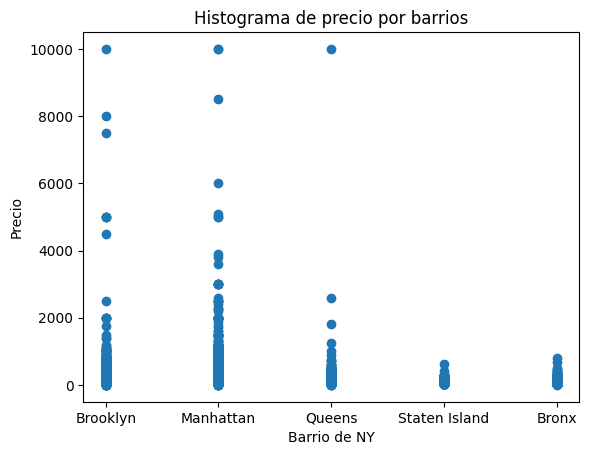

In [6]:
#vemos la distribucion de los precios por barrio
x = base_airbnb_columnas['neighbourhood_group']
y = base_airbnb_columnas["price"]
plt.scatter (x, y)
plt.title("Histograma de precio por barrios") 
plt.xlabel ("Barrio de NY")
plt.ylabel ("Precio")
plt. show()

In [7]:
# OUTLIERS DE PRECIO POR BARRIO

# Outliers por quantiles ya que los datos no tienen una distribucion normal 
Q1 = base_airbnb_columnas.groupby('neighbourhood_group')['price'].quantile(0.25)
Q3 = base_airbnb_columnas.groupby('neighbourhood_group')['price'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Crear un DataFrame con los límites
limits = pd.DataFrame({'lower': lower, 'upper': upper}).reset_index()
# Unir los límites al DataFrame original
base_airbnb_columnas = base_airbnb_columnas.merge(limits, on='neighbourhood_group')

# LO QUE NO ME FUNCIONA
base_airbnb_outliers = base_airbnb_columnas[
    (base_airbnb_columnas['price'] >= base_airbnb_columnas['lower']) & 
    (base_airbnb_columnas['price'] <= base_airbnb_columnas['upper'])]

print(base_airbnb_outliers)

      neighbourhood_group    neighbourhood  latitude  longitude  \
0                Brooklyn       Kensington  40.64749  -73.97237   
1               Manhattan          Midtown  40.75362  -73.98377   
2                Brooklyn     Clinton Hill  40.68514  -73.95976   
3               Manhattan      East Harlem  40.79851  -73.94399   
4               Manhattan      Murray Hill  40.74767  -73.97500   
...                   ...              ...       ...        ...   
38802           Manhattan  Lower East Side  40.71825  -73.99019   
38804           Manhattan  Upper East Side  40.78099  -73.95366   
38805              Queens         Flushing  40.75104  -73.81459   
38807               Bronx       Mott Haven  40.80787  -73.92400   
38808            Brooklyn         Bushwick  40.69805  -73.92801   

             room_type  price  minimum_nights  number_of_reviews last_review  \
0         Private room  149.0               1                  9  2018-10-19   
1      Entire home/apt  225.0      

In [8]:
# Para transformar las variables categoricas neighbourhood_group y room_type en variables numericas aplico One-Hot Encoding 

# separa las categorias de la variable en distintas columnas y le pone valor True si cumple la categoria o False si no
dummies = pd.get_dummies(base_airbnb_outliers, columns = ['neighbourhood_group', 'room_type'], drop_first = False)
# concateno las variables transformadas a la base limpia
base_airbnb_transformadas = pd.concat([base_airbnb_outliers, dummies], axis = 1) 

# columnas a las que me interesa cambiarle los valores de True/False a 0 y 1
columnas = [
    'neighbourhood_group_Brooklyn', 
    'neighbourhood_group_Manhattan', 
    'neighbourhood_group_Queens', 
    'neighbourhood_group_Staten Island', 
    'neighbourhood_group_Bronx',
    'room_type_Private room', 
    'room_type_Shared room',
    'room_type_Entire home/apt']

#le cambio el valor de True/False en 0 y 1
for col in columnas:
    if col in base_airbnb_transformadas.columns:
        base_airbnb_transformadas[col] = base_airbnb_transformadas[col].astype(int)

print(base_airbnb_transformadas)

      neighbourhood_group    neighbourhood  latitude  longitude  \
0                Brooklyn       Kensington  40.64749  -73.97237   
1               Manhattan          Midtown  40.75362  -73.98377   
2                Brooklyn     Clinton Hill  40.68514  -73.95976   
3               Manhattan      East Harlem  40.79851  -73.94399   
4               Manhattan      Murray Hill  40.74767  -73.97500   
...                   ...              ...       ...        ...   
38802           Manhattan  Lower East Side  40.71825  -73.99019   
38804           Manhattan  Upper East Side  40.78099  -73.95366   
38805              Queens         Flushing  40.75104  -73.81459   
38807               Bronx       Mott Haven  40.80787  -73.92400   
38808            Brooklyn         Bushwick  40.69805  -73.92801   

             room_type  price  minimum_nights  number_of_reviews last_review  \
0         Private room  149.0               1                  9  2018-10-19   
1      Entire home/apt  225.0      

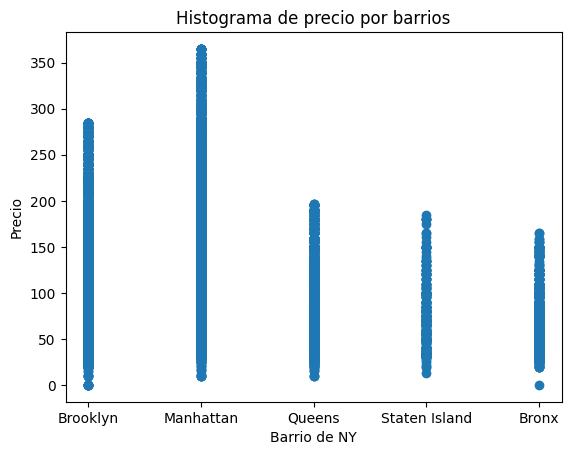

In [9]:
x_2 = base_airbnb_outliers['neighbourhood_group']
y_2 = base_airbnb_outliers["price"]
plt.scatter (x_2, y_2)
plt.title("Histograma de precio por barrios") 
plt.xlabel ("Barrio de NY")
plt.ylabel ("Precio")
plt. show()

In [10]:
print(f"Número de filas antes de eliminar outliers: {base_airbnb_columnas.shape[0]}")
print(f"Número de filas después de eliminar outliers: {base_airbnb_outliers.shape[0]}")

Número de filas antes de eliminar outliers: 38809
Número de filas después de eliminar outliers: 36571


In [12]:
#Creo la nueva variable que cuenta la cantidiad de oferta por barrio
oferta = base_airbnb_transformadas.groupby('neighbourhood_group').size().reset_index(name='offer group')
base_airbnb = base_airbnb_transformadas.merge(oferta, on='neighbourhood_group', how='left')

### Parte II: Graficos y visualizaciones

#### Ejercicio 2
Una vez hecha la limpieza, realicen una matriz de correlación con las siguientes variables:**‘neighbourhood group’, ‘latitude’, ‘longitude’, ‘room type’,‘price’, ‘minimum nights’, ‘number of reviews’, ‘reviews per month’,‘calculated host listings count’, ‘availability 365’.** Comenten los resultados. Utilicen alguno de los comandos disponibles en este link para graficar la matriz de correlacion.

*Nota:* consideren cómo es conveniente incluir las variables que originalmente eran categóricas para poder interpretar mejor la matriz de correlación.

In [155]:
# Lista de variables para al correlacion
variables_corr =  ['latitude', 'longitude', 'price', 'minimum_nights', 
                   'number_of_reviews', 'reviews_per_month', 
                   'calculated_host_listings_count', 'availability_365',
                   'neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn', 
                   'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens', 
                   'room_type_Private room', 'room_type_Shared room']

# Creo un nuevo DataFrame con columnas únicas (.loc[:, eso puse para que no me duplique las columnas)
base_airbnb_corr = base_airbnb.loc[:, variables_corr]

# Matriz de correlación
matriz_corr = base_airbnb_corr.corr()



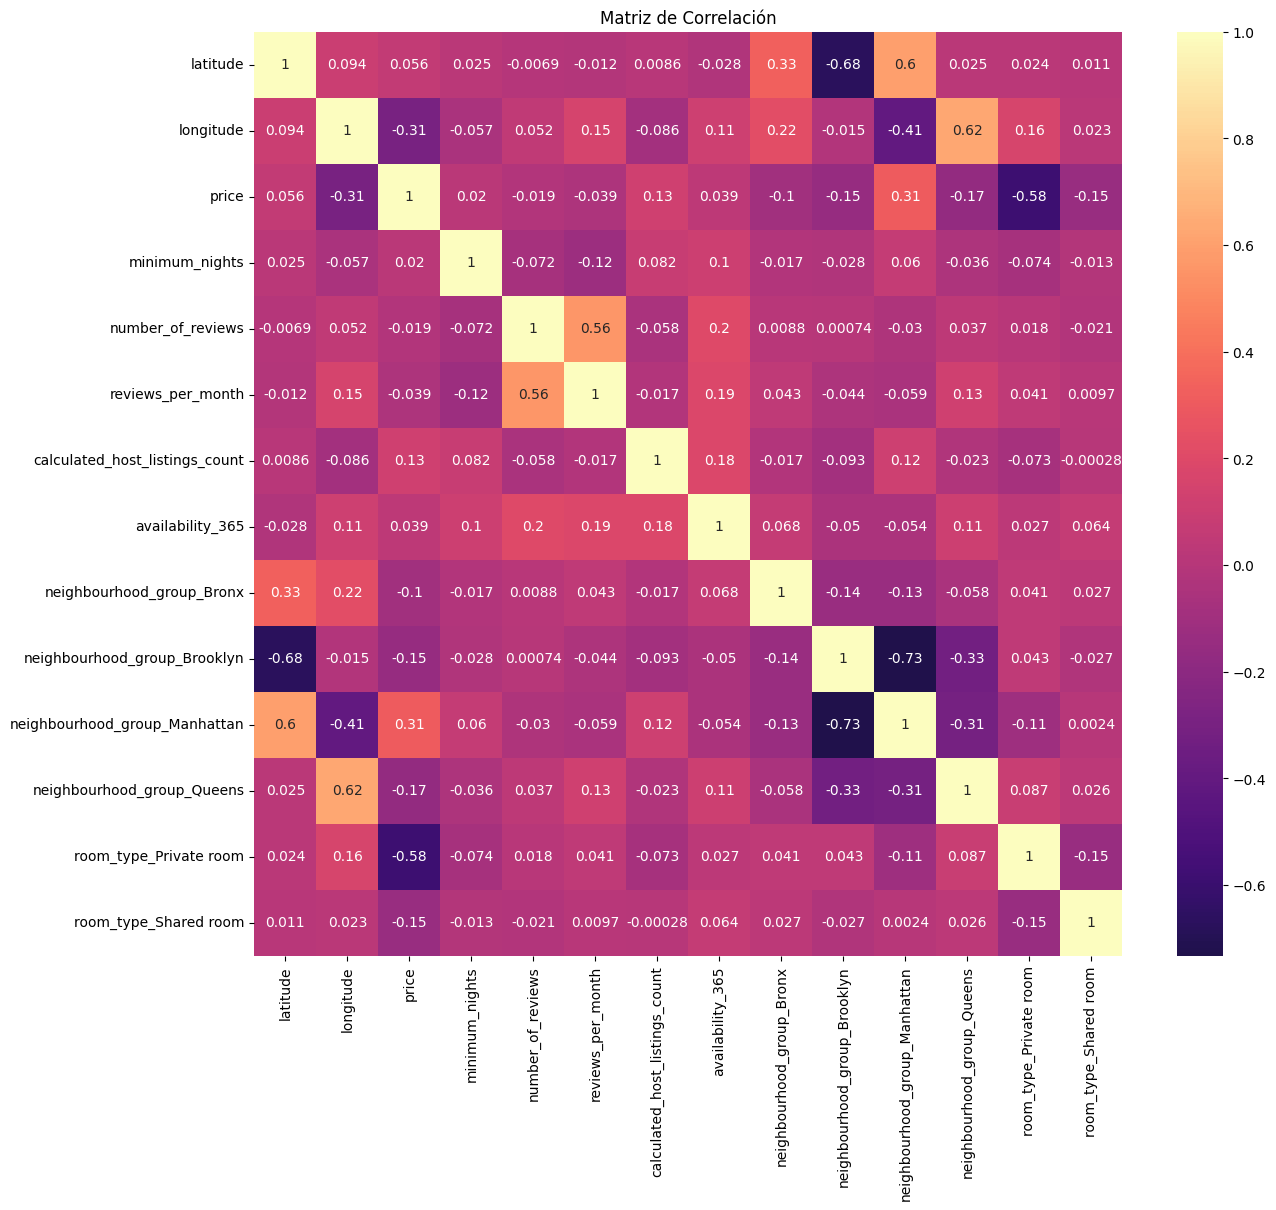

In [164]:
#Grafico la matriz de correlacion, no se si esta bien esto porque no me aparece ningun link ahi arriba pero bueno mientras tanto es algo
plt.figure(figsize=(14, 12))
sns.heatmap(matriz_corr, annot=True, cmap='magma', center=0)
plt.title('Matriz de Correlación')
plt.show()

In [166]:
print(base_airbnb.columns)

Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'neighbourhood_group_Bronx',
       'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan',
       'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room', 'offer group'],
      dtype='object')


#### Ejercicio 3
Respondan las siguientes preguntas: ¿Cuál es la proporción de oferentes por “Neighbourhood group”? ¿Y por tipo de habitación? Además, realicen gráficos para mostrar estas composiciones y comenten los resultados.

In [169]:
# Resolver acá
proporcion_neighbourhood = base_airbnb['neighbourhood_group'].value_counts(normalize=True) * 100
proporcion_room_type = base_airbnb['room_type'].value_counts(normalize=True) * 100

print("Proporción de oferentes por 'Neighbourhood group':")
print(proporcion_neighbourhood)
print("\nProporción de oferentes por 'Tipo de habitación':")
print(proporcion_room_type)

Proporción de oferentes por 'Neighbourhood group':
neighbourhood_group
Brooklyn         43.248394
Manhattan        41.290972
Queens           12.264511
Bronx             2.346728
Staten Island     0.849396
Name: proportion, dtype: float64

Proporción de oferentes por 'Tipo de habitación':
room_type
Entire home/apt    50.157900
Private room       47.563432
Shared room         2.278667
Name: proportion, dtype: float64


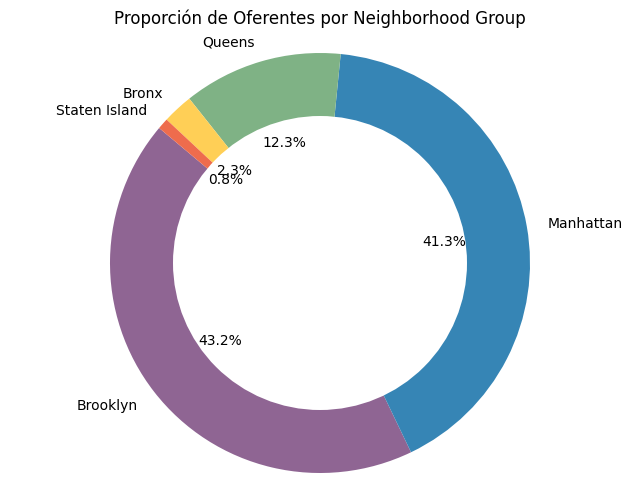

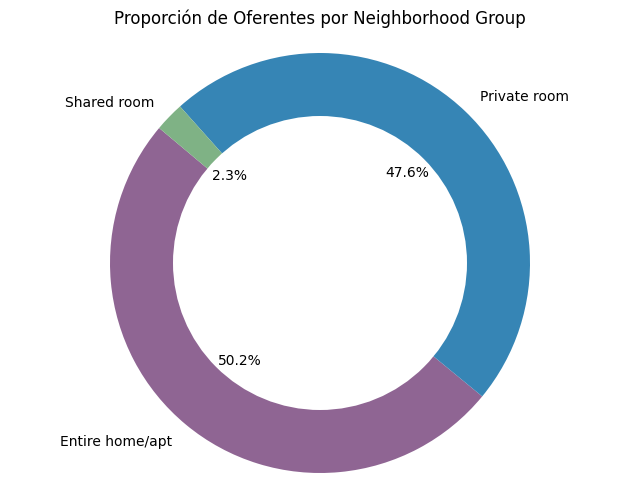

In [196]:
paleta= ['#8F6593', '#3685B5', '#7FB285', '#FFCF56', '#EE6C4D']
#Opcion donas
#Barrio
plt.figure(figsize=(8, 6))
plt.pie(proporcion_neighbourhood, labels=proporcion_neighbourhood.index, autopct='%1.1f%%', startangle=140, colors=paleta)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Proporción de Oferentes por Neighborhood Group')
plt.axis('equal')
plt.show()

#Tipo de cuarto
plt.figure(figsize=(8, 6))
plt.pie(proporcion_room_type, labels=proporcion_room_type.index, autopct='%1.1f%%', startangle=140, colors=paleta)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Proporción de Oferentes por Neighborhood Group')
plt.axis('equal')
plt.show()


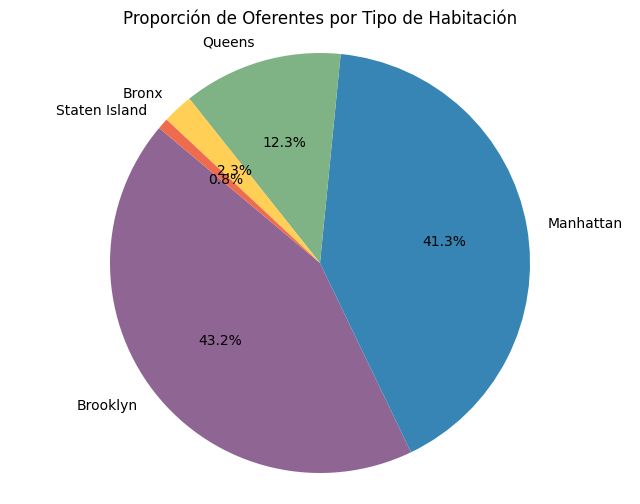

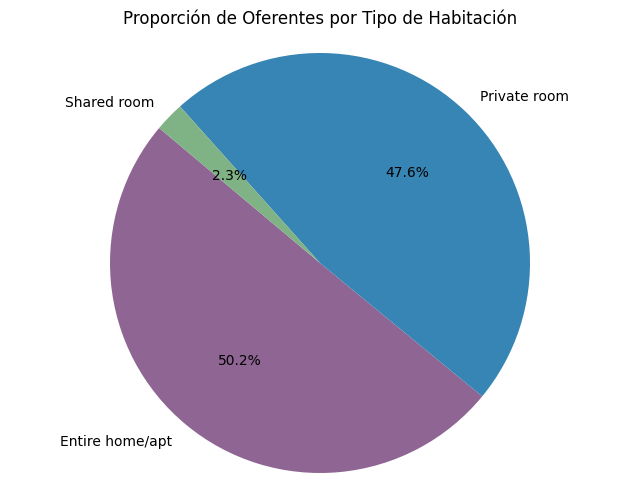

In [199]:
#Opcion tortas
#Barrio
plt.figure(figsize=(8, 6))
plt.pie(proporcion_neighbourhood, labels=proporcion_neighbourhood.index, autopct='%1.1f%%', startangle=140, colors=paleta)
plt.title('Proporción de Oferentes por Tipo de Habitación')
plt.axis('equal')  # Para que el gráfico sea un círculo
plt.show()

#Tipo de cuarto
plt.figure(figsize=(8, 6))
plt.pie(proporcion_room_type, labels=proporcion_room_type.index, autopct='%1.1f%%', startangle=140, colors=paleta)
plt.title('Proporción de Oferentes por Tipo de Habitación')
plt.axis('equal')  # Para que el gráfico sea un círculo
plt.show()

/var/folders/9r/73xgxgj17t7btpfss2pdczcr0000gn/T/ipykernel_3360/3762632447.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=proporcion_neighbourhood.index, y=proporcion_neighbourhood.values, palette=paleta)


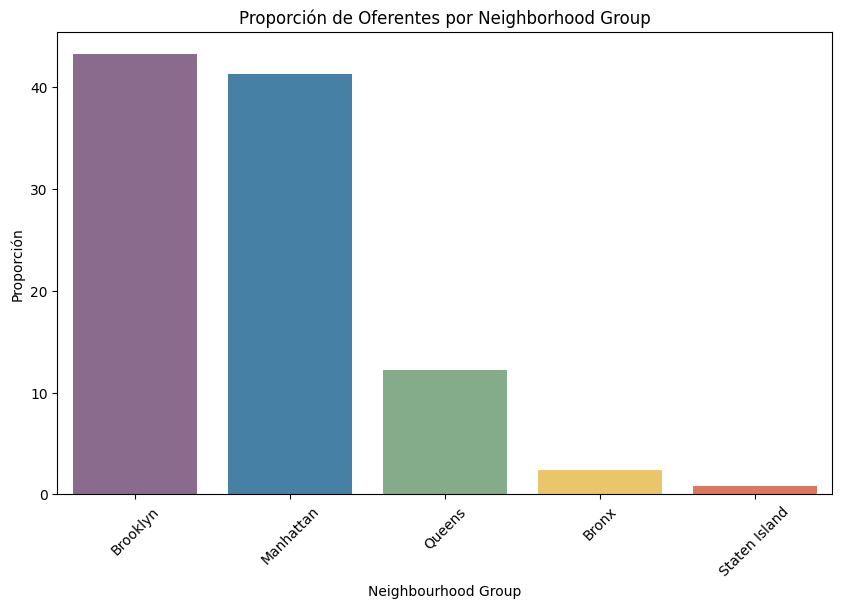

/var/folders/9r/73xgxgj17t7btpfss2pdczcr0000gn/T/ipykernel_3360/3762632447.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=proporcion_room_type.index, y=proporcion_room_type.values, palette=paleta)
/var/folders/9r/73xgxgj17t7btpfss2pdczcr0000gn/T/ipykernel_3360/3762632447.py:12: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(x=proporcion_room_type.index, y=proporcion_room_type.values, palette=paleta)


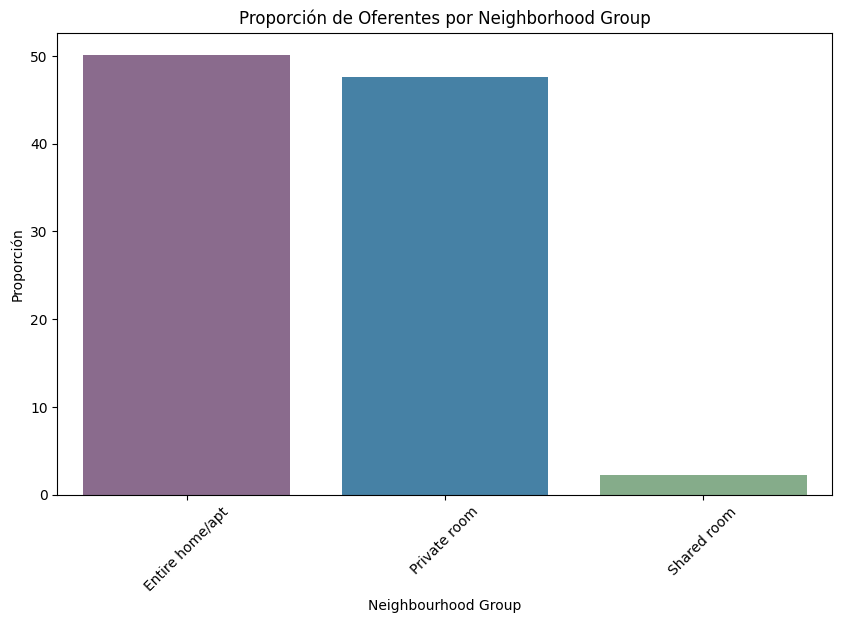

In [205]:
#Opcion barras
#Barrio
plt.figure(figsize=(10, 6))
sns.barplot(x=proporcion_neighbourhood.index, y=proporcion_neighbourhood.values, palette=paleta)
plt.title('Proporción de Oferentes por Neighborhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Proporción')
plt.xticks(rotation=45)  # Rota las etiquetas del eje x si es necesario
plt.show()

#Tipo de cuarto
plt.figure(figsize=(10, 6))
sns.barplot(x=proporcion_room_type.index, y=proporcion_room_type.values, palette=paleta)
plt.title('Proporción de Oferentes por Neighborhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Proporción')
plt.xticks(rotation=45)  # Rota las etiquetas del eje x si es necesario
plt.show()

/var/folders/9r/73xgxgj17t7btpfss2pdczcr0000gn/T/ipykernel_3360/2125327933.py:2: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.countplot(data=base_airbnb, x='neighbourhood_group', hue='room_type', palette=paleta)


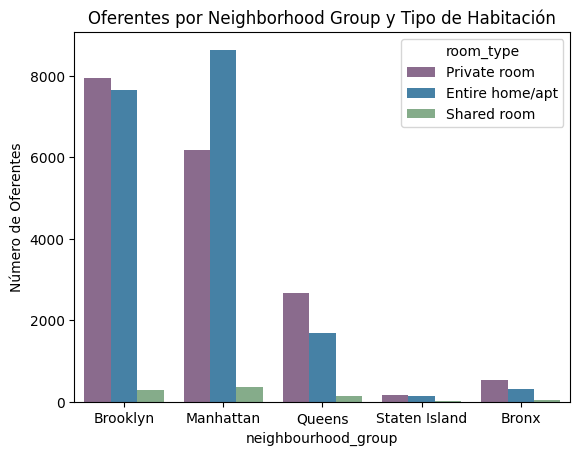

In [214]:
#Aca se ven dividio por barrio las proporciones de cada tipo de cuarto 
sns.countplot(data=base_airbnb, x='neighbourhood_group', hue='room_type', palette=paleta)
plt.title('Oferentes por Neighborhood Group y Tipo de Habitación')
plt.ylabel('Número de Oferentes')
plt.show()

#### Ejercicio 4
Realicen un histograma de los precios de los alojamientos. Comenten el gráfico obtenido. Además, respondan las siguientes preguntas: ¿cuál es el precio mínimo, máximo y promedio? ¿Cuál es la media de precio por “Neighbourhood group” y por tipo de habitación? 


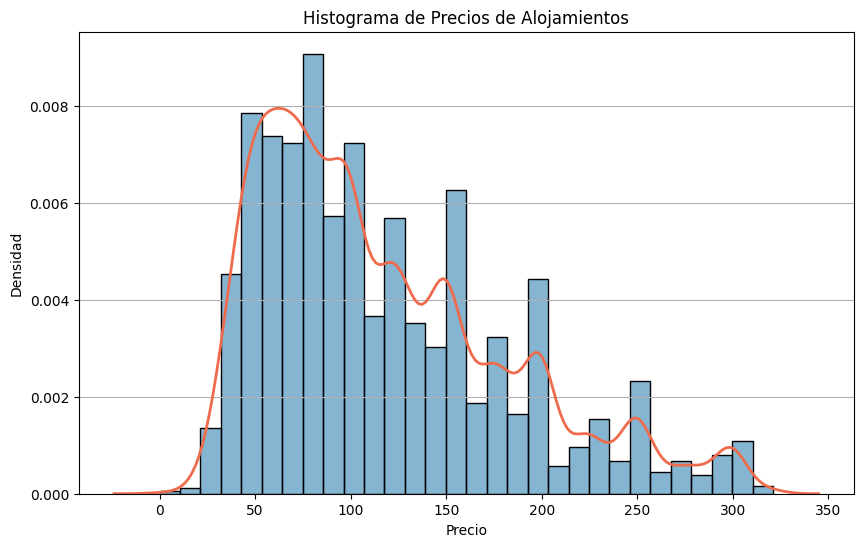

In [216]:
# Resolver acá
plt.figure(figsize=(10, 6))
sns.histplot(base_airbnb['price'], bins=30, color='#3685B5', kde=False, stat="density", alpha=0.6)
sns.kdeplot(base_airbnb['price'], color='#EE6C4D', linewidth=2)
plt.title('Histograma de Precios de Alojamientos')
plt.xlabel('Precio')
plt.ylabel('Densidad')
plt.grid(axis='y')
plt.show()

In [222]:
#Supongo que el precio minimo se va a ir cuando la base de datos este limpia del todo pero me parece raro que haya uno que salga 0 hay que revisar si no se va, me parece raro que el maximos ea 321 tmb 
precio_min = base_airbnb['price'].min()
precio_max = base_airbnb['price'].max()
precio_prom = base_airbnb['price'].mean()
print('Precio Mínimo: ' + str(precio_min))
print('Precio Máximo: ' + str(precio_max))
print(f'Precio Promedio: {precio_prom:.2f}')


Precio Mínimo: 0.0
Precio Máximo: 321.0
Precio Promedio: 117.33


In [224]:
# Media por neighborhood_group
media_neighbourhood = base_airbnb.groupby('neighbourhood_group')['price'].mean()

# Media por room_type
media_room_type = base_airbnb.groupby('room_type')['price'].mean()

print('Media de Precio por Neighborhood Group:')
print(media_neighbourhood)

print('\nMedia de Precio por Tipo de Habitación:')
print(media_room_type)

Media de Precio por Neighborhood Group:
neighbourhood_group
Bronx             74.593968
Brooklyn         105.821667
Manhattan        141.235314
Queens            87.666815
Staten Island     87.163462
Name: price, dtype: float64

Media de Precio por Tipo de Habitación:
room_type
Entire home/apt    158.013841
Private room        77.382920
Shared room         55.470729
Name: price, dtype: float64


#### Ejercicio 5
Realicen dos scatter plots con dos variables de interés en cada uno. Comenten.

In [ ]:
# Resolver acá


#### Ejercicio 6
Utilicen el análisis de componentes principales para graficar las variables en dos dimensiones. Comenten los resultados obtenidos (qué porcentaje de la varianza se logra explicar con dos componentes, cómo son los *loadings*, si ven algún patrón en el gráfico).

In [ ]:
# Resolver acá


### Parte III: Predicción

El objetivo de esta parte del trabajo es intentar predecir los precios de los alojamientos.

#### Ejercicio 7
Eliminen de la base todas las variables relacionadas al precio

In [ ]:
# Resolver acá


#### Ejercicio 8
Partan la base en una base de prueba (test) y una de entrenamiento (train) utilizando el comando <code>train_test_split</code>. La base de entrenamiento debe comprender el 70% de los datos, y la semilla a utilizar (*random state instance*) debe ser 201. Establezca a price como su variable dependiente en la base de entrenamiento (vector y). El resto de las variables ser´an las variables independientes (matriz X). Recuerden agregar la columna de unos (1).

In [ ]:
# Resolver acá


#### Ejercicio 9
Implementen una regresión lineal y comenten los resultados obtenidos.

In [ ]:
# Resolver acá
